In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import warnings; 
warnings.simplefilter('ignore')
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

In [8]:
accident_data = pd.read_csv('Accident_Information.csv', encoding='ISO-8859-1')
vehicle_data = pd.read_csv('Vehicle_Information.csv', encoding='ISO-8859-1')

# Accident data

In [11]:
accident_data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,No


In [13]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

In [15]:
accident_data.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')

# Vehicle data

In [18]:
vehicle_data.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


In [20]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177205 entries, 0 to 2177204
Data columns (total 24 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Accident_Index                    object 
 1   Age_Band_of_Driver                object 
 2   Age_of_Vehicle                    float64
 3   Driver_Home_Area_Type             object 
 4   Driver_IMD_Decile                 float64
 5   Engine_Capacity_.CC.              float64
 6   Hit_Object_in_Carriageway         object 
 7   Hit_Object_off_Carriageway        object 
 8   Journey_Purpose_of_Driver         object 
 9   Junction_Location                 object 
 10  make                              object 
 11  model                             object 
 12  Propulsion_Code                   object 
 13  Sex_of_Driver                     object 
 14  Skidding_and_Overturning          object 
 15  Towing_and_Articulation           object 
 16  Vehicle_Leaving_Carriageway       ob

In [22]:
vehicle_data.columns

Index(['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway',
       'Journey_Purpose_of_Driver', 'Junction_Location', 'make', 'model',
       'Propulsion_Code', 'Sex_of_Driver', 'Skidding_and_Overturning',
       'Towing_and_Articulation', 'Vehicle_Leaving_Carriageway',
       'Vehicle_Location.Restricted_Lane', 'Vehicle_Manoeuvre',
       'Vehicle_Reference', 'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive',
       'X1st_Point_of_Impact', 'Year'],
      dtype='object')

# Merge Datasets 

In [25]:
# Merge datasets on 'Accident_Index'
road_accident_data = pd.merge(accident_data, vehicle_data, on='Accident_Index', how='inner') 
road_accident_data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
0,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005
1,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005
2,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005
3,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005
4,200501BS00006,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-11,Tuesday,1.0,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Moving off,1,Car,No,Did not impact,2005


# Data Preprocessing

In [27]:
road_accident_data.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year_x', 'InScotland', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway',


In [28]:
columns_to_drop = ['1st_Road_Class', '1st_Road_Number', '2nd_Road_Class', '2nd_Road_Number',
                   'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident',
                   'Junction_Control', 'Junction_Detail', 'Latitude',
                   'Local_Authority_(District)', 'Local_Authority_(Highway)',
                   'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
                   'LSOA_of_Accident_Location', 'Pedestrian_Crossing-Human_Control',
                   'Pedestrian_Crossing-Physical_Facilities', 'Police_Force', 
                   'Special_Conditions_at_Site', 'Urban_or_Rural_Area', 'Year_x',
                   'InScotland', 'Driver_Home_Area_Type', 'Driver_IMD_Decile', 
                   'Engine_Capacity_.CC.', 'Hit_Object_in_Carriageway', 
                   'Hit_Object_off_Carriageway', 'Journey_Purpose_of_Driver', 
                   'Junction_Location', 'make', 'model', 'Propulsion_Code',
                   'Skidding_and_Overturning', 'Towing_and_Articulation', 
                   'Vehicle_Leaving_Carriageway', 'Vehicle_Location.Restricted_Lane',
                   'Vehicle_Reference', 'Was_Vehicle_Left_Hand_Drive', 
                   'X1st_Point_of_Impact']

road_accident_df = road_accident_data.drop(columns=columns_to_drop, axis=1)
road_accident_df.head()

,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Weather_Conditions,Age_Band_of_Driver,Age_of_Vehicle,Sex_of_Driver,Vehicle_Manoeuvre,Vehicle_Type,Year_y
0,200501BS00002,Slight,2005-01-05,Wednesday,Darkness - lights lit,1,1,Dry,Dual carriageway,30.0,17:36,Fine no high winds,36 - 45,3.0,Male,Slowing or stopping,Bus or coach (17 or more pass seats),2005
1,200501BS00003,Slight,2005-01-06,Thursday,Darkness - lights lit,1,2,Dry,Single carriageway,30.0,00:15,Fine no high winds,26 - 35,5.0,Male,Going ahead right-hand bend,Bus or coach (17 or more pass seats),2005
2,200501BS00004,Slight,2005-01-07,Friday,Daylight,1,1,Dry,Single carriageway,30.0,10:35,Fine no high winds,46 - 55,4.0,Female,Going ahead other,Car,2005
3,200501BS00005,Slight,2005-01-10,Monday,Darkness - lighting unknown,1,1,Wet or damp,Single carriageway,30.0,21:13,Fine no high winds,46 - 55,10.0,Male,Going ahead other,Motorcycle 125cc and under,2005
4,200501BS00006,Slight,2005-01-11,Tuesday,Daylight,1,2,Wet or damp,Single carriageway,30.0,12:40,Raining no high winds,46 - 55,1.0,Male,Moving off,Car,2005


In [32]:
road_accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058408 entries, 0 to 2058407
Data columns (total 18 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Accident_Index           object 
 1   Accident_Severity        object 
 2   Date                     object 
 3   Day_of_Week              object 
 4   Light_Conditions         object 
 5   Number_of_Casualties     int64  
 6   Number_of_Vehicles       int64  
 7   Road_Surface_Conditions  object 
 8   Road_Type                object 
 9   Speed_limit              float64
 10  Time                     object 
 11  Weather_Conditions       object 
 12  Age_Band_of_Driver       object 
 13  Age_of_Vehicle           float64
 14  Sex_of_Driver            object 
 15  Vehicle_Manoeuvre        object 
 16  Vehicle_Type             object 
 17  Year_y                   int64  
dtypes: float64(2), int64(3), object(13)
memory usage: 282.7+ MB


In [34]:
# Select categorical columns
categorical_columns = road_accident_df.select_dtypes(include=['object', 'category'])

# Loop through categorical columns and print unique values
for column in categorical_columns:
    print(f"Unique values in {column}: {categorical_columns[column].unique()}\n")


Unique values in Accident_Index: ['200501BS00002' '200501BS00003' '200501BS00004' ... '2016984131216'
 '2016984131316' '2016984133416']

Unique values in Accident_Severity: ['Slight' 'Serious' 'Fatal']

Unique values in Date: ['2005-01-05' '2005-01-06' '2005-01-07' ... '2016-07-31' '2016-08-01'
 '2016-01-16']

Unique values in Day_of_Week: ['Wednesday' 'Thursday' 'Friday' 'Monday' 'Tuesday' 'Sunday' 'Saturday']

Unique values in Light_Conditions: ['Darkness - lights lit' 'Daylight' 'Darkness - lighting unknown'
 'Darkness - lights unlit' 'Darkness - no lighting'
 'Data missing or out of range']

Unique values in Road_Surface_Conditions: ['Dry' 'Wet or damp' 'Snow' 'Frost or ice' 'Flood over 3cm. deep'
 'Data missing or out of range']

Unique values in Road_Type: ['Dual carriageway' 'Single carriageway' 'One way street' 'Roundabout'
 'Slip road' 'Unknown' 'Data missing or out of range']

Unique values in Time: ['17:36' '00:15' '10:35' ... '03:31' '03:29' '03:39']

Unique values in Weath

In [36]:
road_accident_df.dropna()

,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Weather_Conditions,Age_Band_of_Driver,Age_of_Vehicle,Sex_of_Driver,Vehicle_Manoeuvre,Vehicle_Type,Year_y
0,200501BS00002,Slight,2005-01-05,Wednesday,Darkness - lights lit,1,1,Dry,Dual carriageway,30.0,17:36,Fine no high winds,36 - 45,3.0,Male,Slowing or stopping,Bus or coach (17 or more pass seats),2005
1,200501BS00003,Slight,2005-01-06,Thursday,Darkness - lights lit,1,2,Dry,Single carriageway,30.0,00:15,Fine no high winds,26 - 35,5.0,Male,Going ahead right-hand bend,Bus or coach (17 or more pass seats),2005
2,200501BS00004,Slight,2005-01-07,Friday,Daylight,1,1,Dry,Single carriageway,30.0,10:35,Fine no high winds,46 - 55,4.0,Female,Going ahead other,Car,2005
3,200501BS00005,Slight,2005-01-10,Monday,Darkness - lighting unknown,1,1,Wet or damp,Single carriageway,30.0,21:13,Fine no high winds,46 - 55,10.0,Male,Going ahead other,Motorcycle 125cc and under,2005
4,200501BS00006,Slight,2005-01-11,Tuesday,Daylight,1,2,Wet or damp,Single carriageway,30.0,12:40,Raining no high winds,46 - 55,1.0,Male,Moving off,Car,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058401,2016984130916,Slight,2016-10-28,Friday,Darkness - lights lit,1,2,Wet or damp,Single carriageway,30.0,06:45,Fine no high winds,46 - 55,8.0,Female,Going ahead other,Car,2016
2058402,2016984130916,Slight,2016-10-28,Friday,Darkness - lights lit,1,2,Wet or damp,Single carriageway,30.0,06:45,Fine no high winds,Data missing or out of range,11.0,Not known,Parked,Car,2016
2058403,2016984131116,Slight,2016-11-01,Tuesday,Daylight,2,2,Dry,Single carriageway,60.0,16:45,Fine no high winds,21 - 25,14.0,Female,Going ahead other,Car,2016
2058406,2016984131316,Slight,2016-10-29,Saturday,Darkness - lights lit,3,1,Dry,Single carriageway,40.0,20:00,Fine no high winds,16 - 20,13.0,Male,Going ahead other,Car,2016


## Normalization

In [48]:
road_accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058408 entries, 0 to 2058407
Data columns (total 18 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Accident_Index           object 
 1   Accident_Severity        object 
 2   Date                     object 
 3   Day_of_Week              object 
 4   Light_Conditions         object 
 5   Number_of_Casualties     int64  
 6   Number_of_Vehicles       int64  
 7   Road_Surface_Conditions  object 
 8   Road_Type                object 
 9   Speed_limit              float64
 10  Time                     object 
 11  Weather_Conditions       object 
 12  Age_Band_of_Driver       object 
 13  Age_of_Vehicle           float64
 14  Sex_of_Driver            object 
 15  Vehicle_Manoeuvre        object 
 16  Vehicle_Type             object 
 17  Year_y                   int64  
dtypes: float64(2), int64(3), object(13)
memory usage: 282.7+ MB


In [52]:
#understand the range of continuous values in each column to know how best to normalize them
casualities = road_accident_df['Number_of_Casualties'].min(), road_accident_df['Number_of_Casualties'].max()
print("The minimum and maximum values for the casualties feature range from:", casualities)

vehicles = road_accident_df['Number_of_Vehicles'].min(), road_accident_df['Number_of_Vehicles'].max()
print("The minimum and maximum values for the number of vehicles feature range from:", vehicles)

speed_limit = road_accident_df['Speed_limit'].min(), road_accident_df['Speed_limit'].max()
print("The minimum and maximum values for teh speed limit feature range from:", speed_limit)

age_of_vehicle = road_accident_df['Age_of_Vehicle'].min(), road_accident_df['Age_of_Vehicle'].max()
print("The minimum and maximum values for the vehicle age feature range from:", age_of_vehicle)

year = road_accident_df['Year_y'].min(), road_accident_df['Year_y'].max()
print("The minimum and maximum values for the year feature range from:", year) 

The minimum and maximum values for the casualties feature range from: (1, 93)
The minimum and maximum values for the number of vehicles feature range from: (1, 67)
The minimum and maximum values for teh speed limit feature range from: (0.0, 70.0)
The minimum and maximum values for the vehicle age feature range from: (1.0, 111.0)
The minimum and maximum values for the year feature range from: (2005, 2016)


# Exploratory Data Analysis

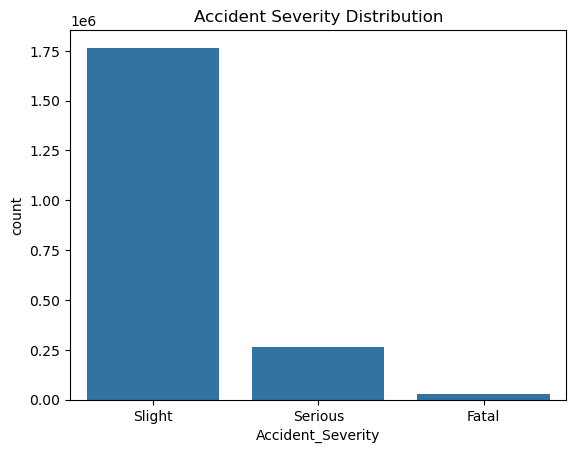

In [175]:
# Distribution of accident severity to understand class balance
sns.countplot(x='Accident_Severity', data=road_accident_df)
plt.title('Accident Severity Distribution')
plt.show()

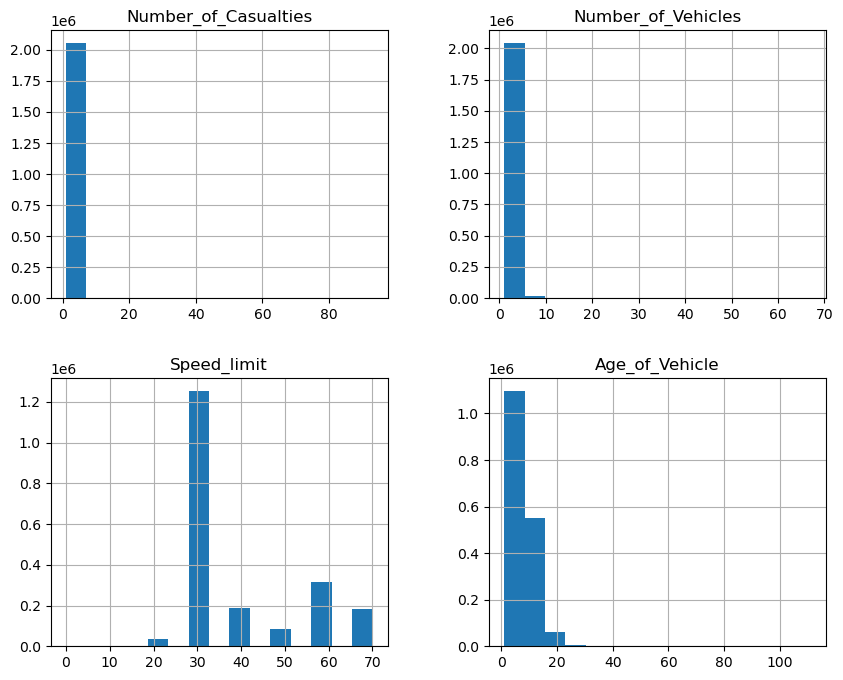

In [187]:
#understanding the distribution between continuous variables to identifdy skewness and outliers and general spread
road_accident_df[['Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit', 'Age_of_Vehicle']].hist(bins=15, figsize=(10, 8))
plt.show()

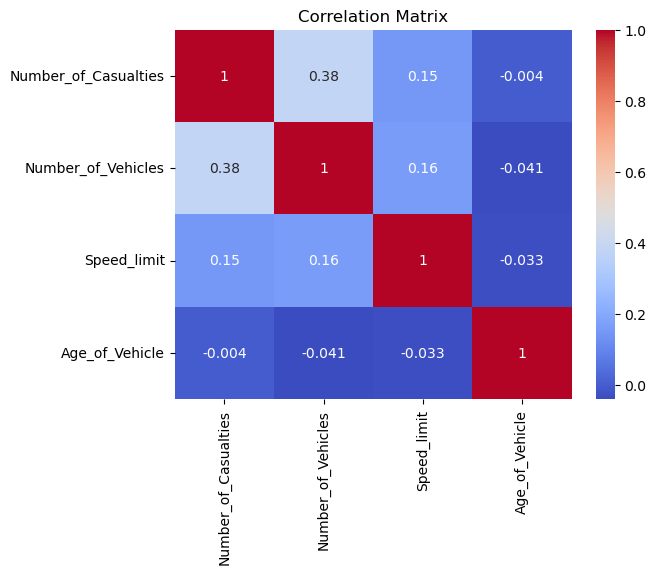

In [183]:
#Correlation between continuous variables
corr_matrix = road_accident_df[['Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit', 'Age_of_Vehicle']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Exploring the Relationships between various variables

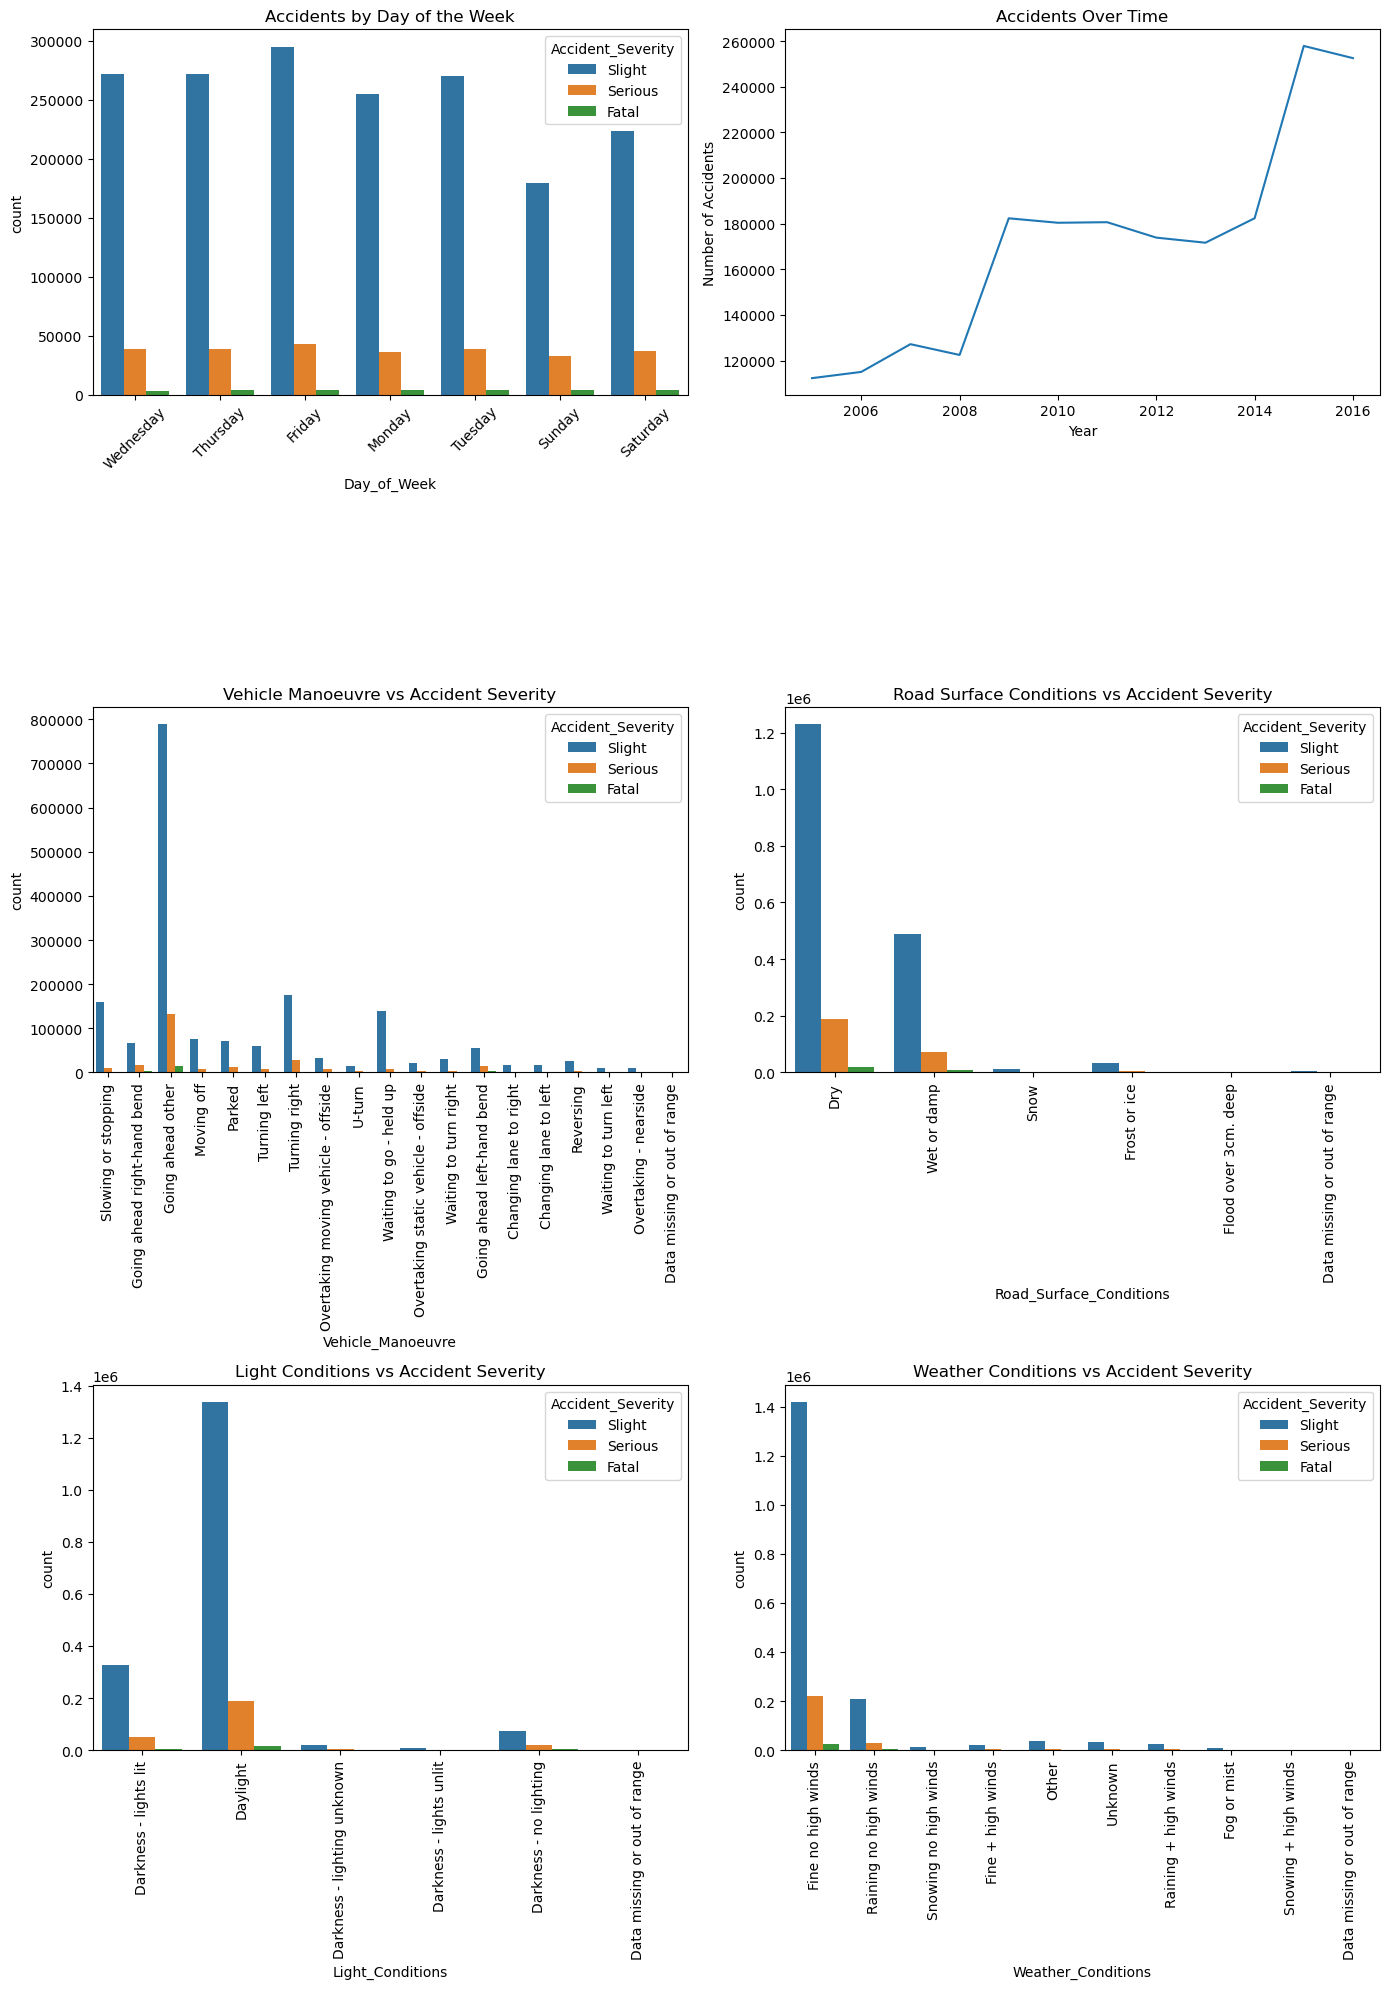

In [226]:
# Create a figure and subplots grid (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(14, 20))

# --- Plot 1: Accidents by Day of the Week ---
sns.countplot(x='Day_of_Week', hue='Accident_Severity', data=road_accident_df, ax=axes[0, 0])
axes[0, 0].set_title('Accidents by Day of the Week')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# --- Plot 2: Accidents Over Time (Yearly) ---
road_accident_df['Date'] = pd.to_datetime(road_accident_df['Date'])
road_accident_df['Year'] = road_accident_df['Date'].dt.year
accidents_by_year = road_accident_df.groupby('Year')['Accident_Index'].count()
accidents_by_year.plot(kind='line', title='Accidents Over Time', ax=axes[0, 1])
axes[0, 1].set_ylabel('Number of Accidents')

# --- Plot 3: Vehicle Manoeuvre vs Accident Severity ---
sns.countplot(x='Vehicle_Manoeuvre', hue='Accident_Severity', data=road_accident_df, ax=axes[1, 0])
axes[1, 0].set_title('Vehicle Manoeuvre vs Accident Severity')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)

# --- Plot 4: Road Surface Conditions vs Accident Severity ---
sns.countplot(x='Road_Surface_Conditions', hue='Accident_Severity', data=road_accident_df, ax=axes[1, 1])
axes[1, 1].set_title('Road Surface Conditions vs Accident Severity')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)

# --- Plot 5: Light Conditions vs Accident Severity ---
sns.countplot(x='Light_Conditions', hue='Accident_Severity', data=road_accident_df, ax=axes[2, 0])
axes[2, 0].set_title('Light Conditions vs Accident Severity')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=90)

# --- Plot 6: Weather Conditions vs Accident Severity ---
sns.countplot(x='Weather_Conditions', hue='Accident_Severity', data=road_accident_df, ax=axes[2, 1])
axes[2, 1].set_title('Weather Conditions vs Accident Severity')
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=90)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


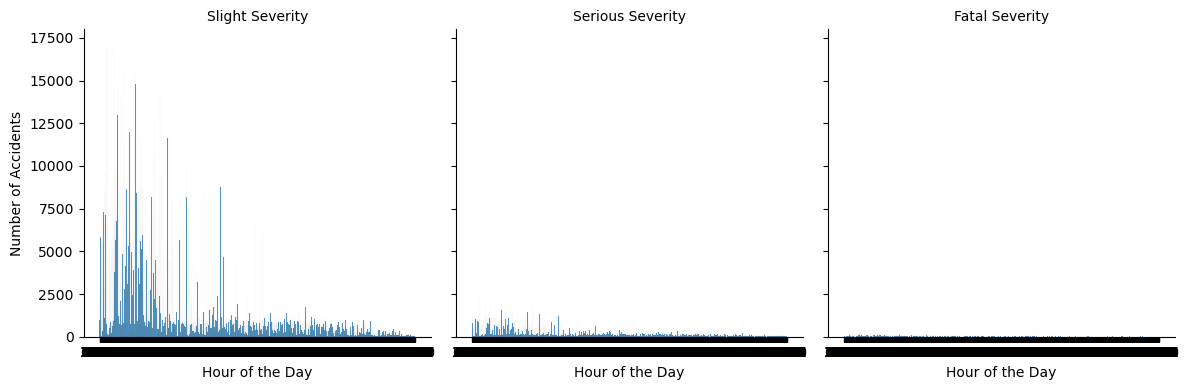

In [228]:
g = sns.FacetGrid(road_accident_df, col="Accident_Severity", col_wrap=3, height=4)
g.map(sns.histplot, "Time", bins=24)
g.set_titles("{col_name} Severity")
g.set_axis_labels("Hour of the Day", "Number of Accidents")
plt.show()